# Project Title: Prediction of Heart Diesease using Machine Learning

# Importing the necessary libraries

    First step of all the Machine Learning task is to import necessarry libraries and below are those librarie

In [1]:

!pip install seaborn
import pandas as pd                    ## importing Data manipulation library
import numpy as np                     ## import numerical python library
import seaborn as sns                  ## Visualization library
import matplotlib.pyplot as plt        ## Another visualization library
from sklearn.pipeline import Pipeline  ## sklear is ML library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder ,MinMaxScaler ,StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.metrics import accuracy_score ,f1_score
import joblib     ## import model saving library

In [2]:
## Importing the Data Set
# first step is to read the file using pd.read_csv("")

data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
## check for any missing values
## We can check for missing rows using the bellow code

data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
## Drop any duplicates Value

data.duplicated().sum()  ## This code will check for duplicated rows

0

In [5]:
# Replace incorrect values

# data['Sex'] = data['Sex'].replace({'M':0, 'F':1})  ## this is not needed



# Data Visualization



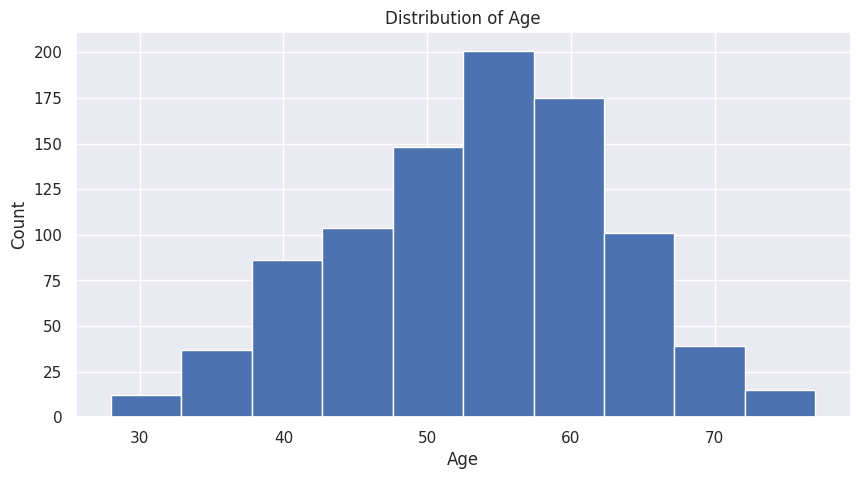

In [6]:
## Use a visually appealing style sheet like seaborn:
## check for distribution of data using a histogram


sns.set_theme(style="darkgrid")  ## setting a theme of plot
plt.figure(figsize=(10, 5));    ## set figure size

# Visualize distribution of Age
plt.hist(data['Age'])           ## plot the age distribution
plt.title('Distribution of Age')  ## set title of plot
plt.xlabel('Age') 
plt.ylabel('Count');

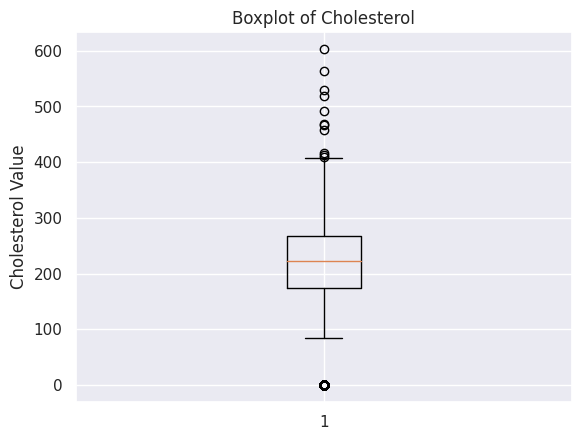

In [7]:
# Boxplot for Cholesterol
## boxplot shows outliers in any data or features
plt.boxplot(data['Cholesterol'])
plt.title('Boxplot of Cholesterol')
plt.ylabel('Cholesterol Value');

<AxesSubplot: xlabel='HeartDisease', ylabel='Cholesterol'>

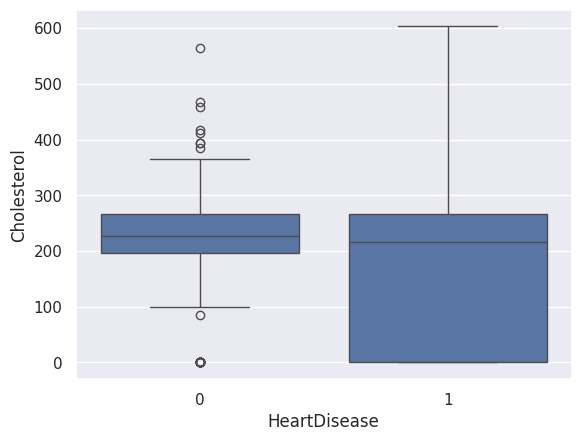

In [8]:
# Boxplot of Cholesterol by Heart Disease 
# this also check outliers in data . 
sns.boxplot(x='HeartDisease', y='Cholesterol', data=data)

<AxesSubplot: xlabel='Age', ylabel='MaxHR'>

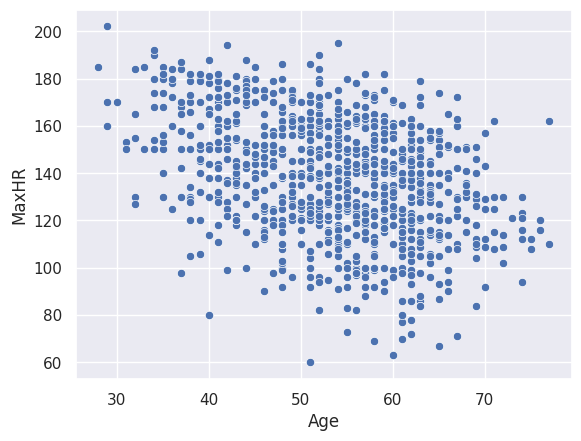

In [9]:
# Scatter plot between Age and MaxHR
## showing scatter plot of data
sns.scatterplot(x='Age', y='MaxHR', data=data)

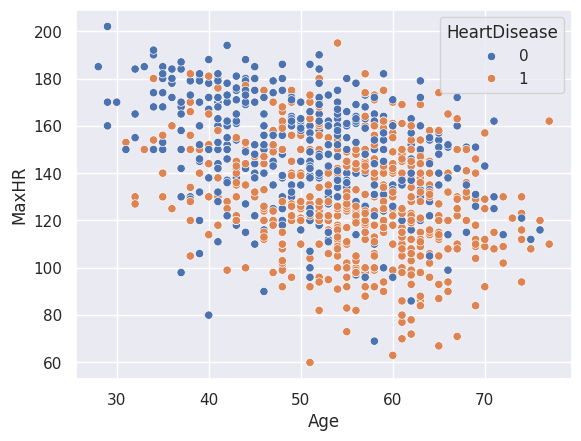

In [10]:
# Scatter plot between Age and MaxHR 
sns.scatterplot(x='Age', y='MaxHR', hue='HeartDisease', data=data);

<AxesSubplot: xlabel='FastingBS', ylabel='Count'>

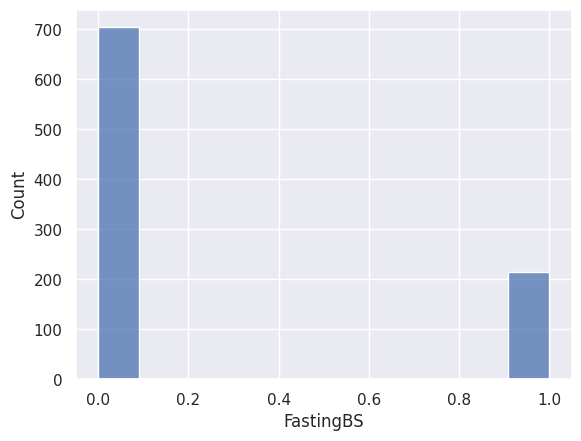

In [11]:
# Histogram for FastingBS 
sns.histplot(data=data, x='FastingBS', kde=False)

Text(0, 0.5, 'Disease')

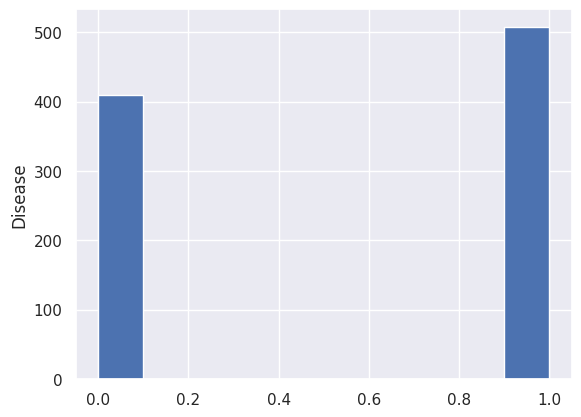

In [12]:
# Countplot for HeartDisease
plt.hist(data['HeartDisease']);
plt.ylabel("Disease")

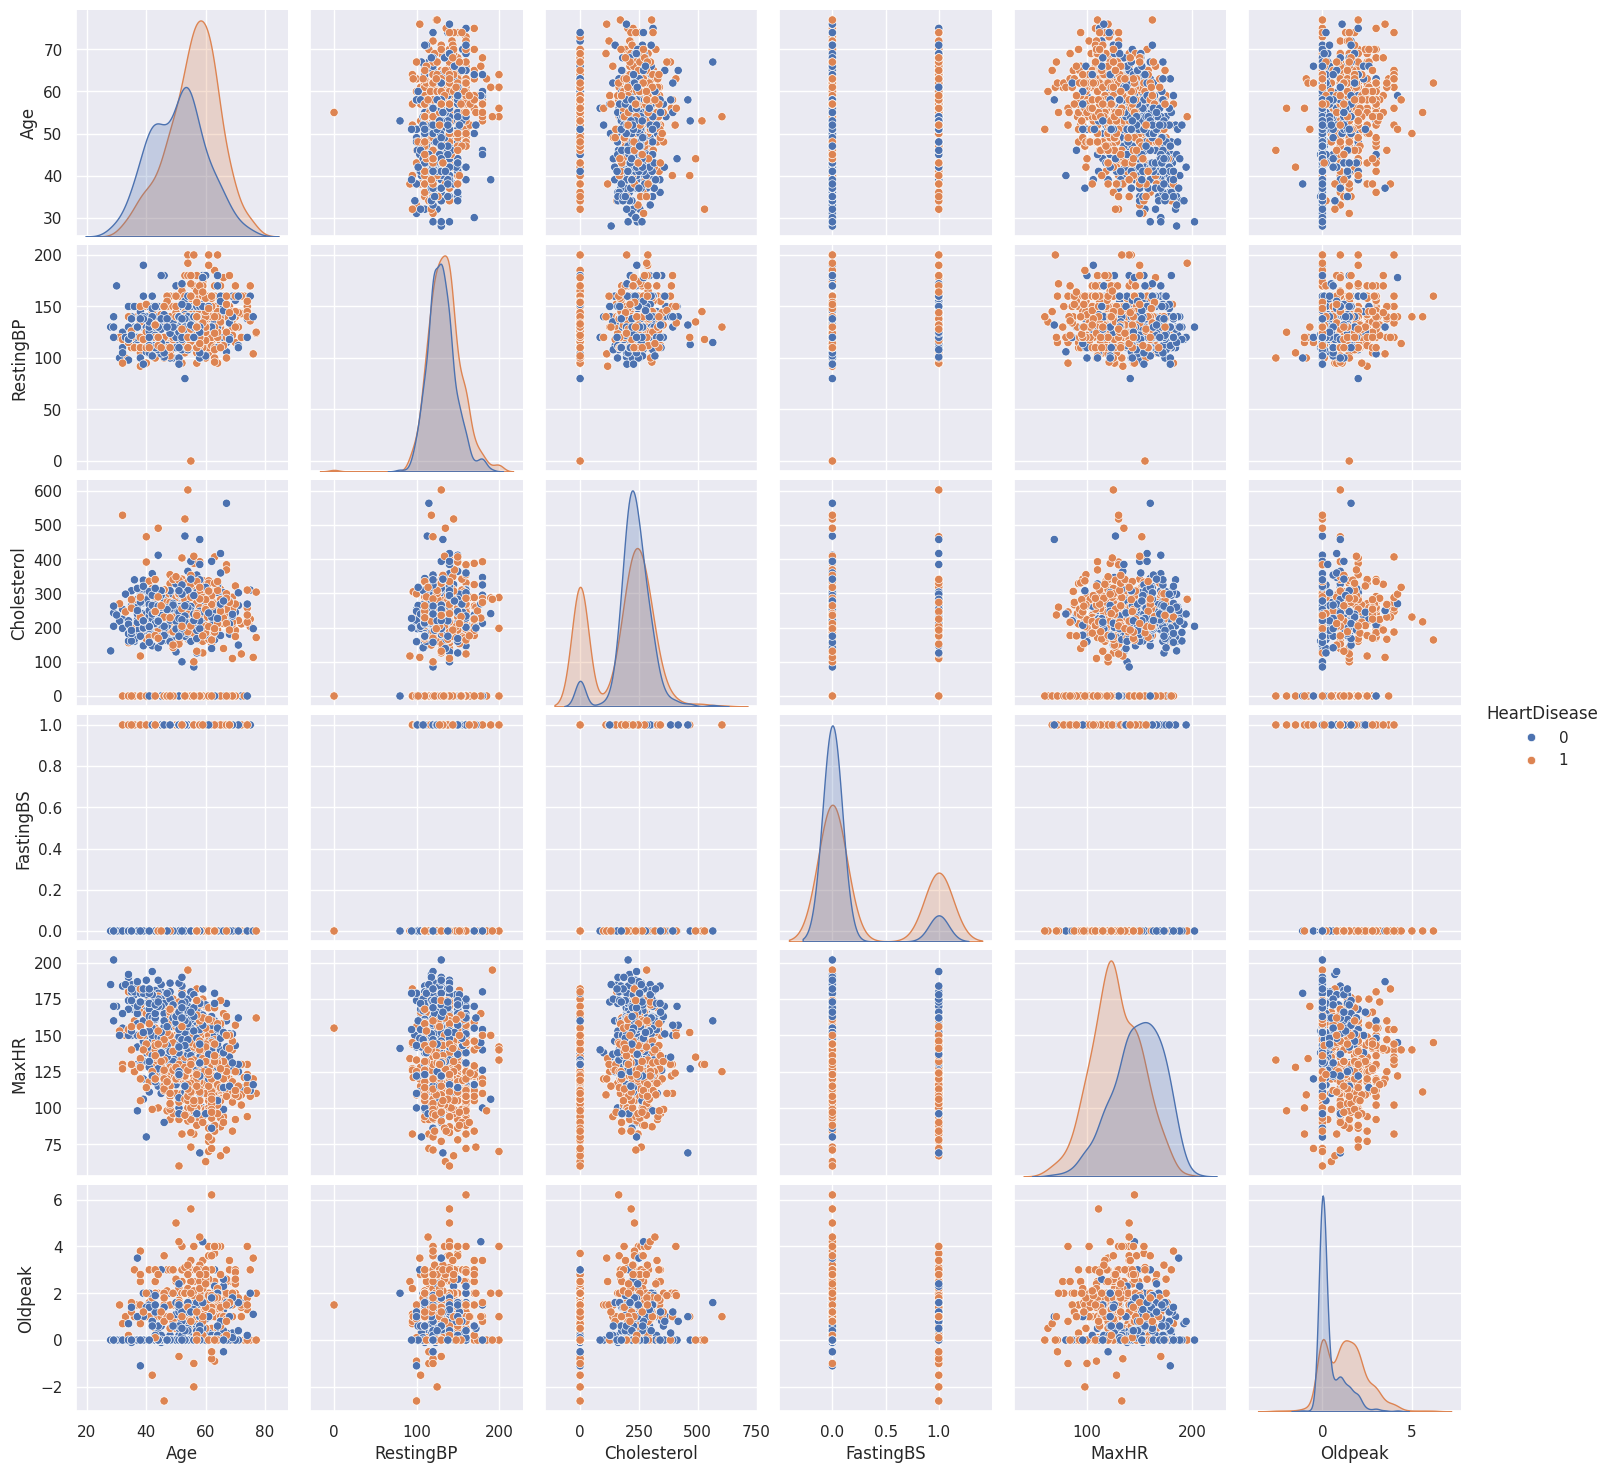

In [13]:
# Pairplot gives us plot of every feature with each other
sns.pairplot(data, hue='HeartDisease') 

<AxesSubplot: >

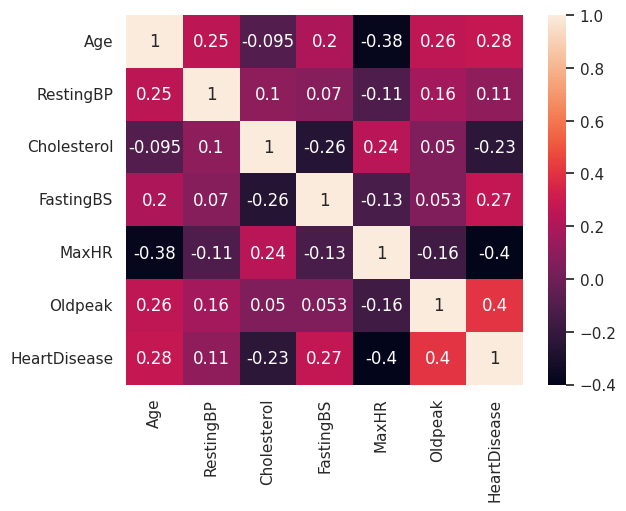

In [14]:
# Specify numeric_only=True explicitly

## check heatma for correlation between each data points
corr_mat = data.corr(numeric_only=True)

# Or select only numerical columns
num_cols = data.select_dtypes(include=['float', 'int'])
corr_mat = num_cols.corr()
sns.heatmap(corr_mat,annot=True)

In [15]:
## Cheaking statiscal values 
data.describe().T  ## will give us a statiscal measures of each numerical column

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


# Data Preprocessing and Model Selection

In [16]:
## Now we split the data into X and Y and then scale the numerical coumns and onehotencode the categorical features. and create a complete pipeline for
## for training and testing model 

x = data.drop("HeartDisease",axis=1)
y = data.HeartDisease

cat = ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]
num = ["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"]

numeric_transformer = Pipeline(steps = [("scaler",MinMaxScaler())])
category_transformer = Pipeline(steps = [ ("encoder",OneHotEncoder()) ])

preprocessor  = ColumnTransformer([("category",category_transformer,cat),
                                 ("numerical",numeric_transformer,num)],remainder='passthrough')

pipeline = Pipeline([("Preprocessor",preprocessor),
                     ("classifier",RandomForestClassifier())])



## spliting the data into train test 
x_train ,x_test ,y_train ,y_test = train_test_split(x ,y,test_size=0.2 ,random_state = 42)


## fitting the model to data
pipeline.fit(x_train , y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('category',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope']),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak'])])),
                ('classifier', RandomForestClassifier())])

## Model Evaluation

In [17]:
## model score will give us accuracy of the model
print("Model score :",pipeline.score(x_test ,y_test)*100,"%")


Model score : 88.58695652173914 %


In [18]:
## Predicted Value on test Data 
y_preds = pipeline.predict(x_test)
y_preds

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1])

In [19]:
## accuracy Score
print("Accuracy score :",accuracy_score(y_test , y_preds))

Accuracy score : 0.8858695652173914


In [20]:
## f1 score
print("f1_score :",f1_score(y_test , y_preds))  ## will show us f1 score

f1_score : 0.9004739336492891


In [21]:
## Joblib.dump() will save our pipeline model into a pkl file so we dont need to train again and agin and this .pkl file can be used in model deployment
joblib.dump(pipeline ,"pipeline.pkl")

['pipeline.pkl']

## Model Deployment (Checking the model on user input)

In [22]:
df = pd.read_csv("heart.csv")
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#####  Now we will manually deploy the model to test it
age = int(input("Enter the Age: "))
sex = input("Enter the Sex(M or F): ")
chest_pain_type = input("Enter the Chest Pain Type: ")
resting_bp = float(input("Enter the Resting Blood Pressure: "))
cholesterol = float(input("Enter the Cholesterol level: "))
fasting_bs = input("Fasting Blood Sugar (1 for > 120 mg/dl, 0 otherwise): ")
resting_ecg = input("Resting ECG Type: ")
max_hr = float(input("Enter the Maximum Heart Rate: "))
exercise_angina = input("Exercise-Induced Angina (Y, N): ")
oldpeak = float(input("Enter the ST Depression induced by exercise relative to rest: "))
st_slope = input("ST Slope Type: ")

# Create a DataFrame with the user input
data = pd.DataFrame({
    'Age': [age],
    'Sex': [sex],
    'ChestPainType': [chest_pain_type],
    'RestingBP': [resting_bp],
    'Cholesterol': [cholesterol],
    'FastingBS': [fasting_bs],
    'RestingECG': [resting_ecg],
    'MaxHR': [max_hr],
    'ExerciseAngina': [exercise_angina],
    'Oldpeak': [oldpeak],
    'ST_Slope': [st_slope]
})

# Predict the data
transformed_data = pipeline["Preprocessor"].transform(data)
prediction = pipeline["classifier"].predict(transformed_data)

print("The Label is:", prediction[0])

## 0 mean no heart disease and 1 mean heart disease